# Column Descriptions

* Column Name	Description
* ACTION	ACTION is 1 if the resource was approved, 0 if the resource was not
* RESOURCE	An ID for each resource
* MGR_ID	The EMPLOYEE ID of the manager of the current EMPLOYEE ID record; an employee may have only one manager at a time
* ROLE_ROLLUP_1	Company role grouping category id 1 (e.g. US Engineering)
* ROLE_ROLLUP_2	Company role grouping category id 2 (e.g. US Retail)
* ROLE_DEPTNAME	Company role department description (e.g. Retail)
* ROLE_TITLE	Company role business title description (e.g. Senior Engineering Retail Manager)
* ROLE_FAMILY_DESC	Company role family extended description (e.g. Retail Manager, Software Engineering)
* ROLE_FAMILY	Company role family description (e.g. Retail Manager)
* ROLE_CODE	Company role code; this code is unique to each role (e.g. Manager)

# Imports

In [32]:
import pandas as pd
from __future__ import division
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
from sklearn.preprocessing import label_binarize
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, confusion_matrix,precision_recall_curve
from sklearn.cross_validation import KFold, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import (metrics, cross_validation, linear_model, preprocessing)

from scipy import interp

In [33]:
train = pd.read_csv('train.csv')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
ACTION              32769 non-null int64
RESOURCE            32769 non-null int64
MGR_ID              32769 non-null int64
ROLE_ROLLUP_1       32769 non-null int64
ROLE_ROLLUP_2       32769 non-null int64
ROLE_DEPTNAME       32769 non-null int64
ROLE_TITLE          32769 non-null int64
ROLE_FAMILY_DESC    32769 non-null int64
ROLE_FAMILY         32769 non-null int64
ROLE_CODE           32769 non-null int64
dtypes: int64(10)
memory usage: 2.5 MB


In [50]:
train.describe()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
count,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000,32769.000000
mean,0.942110,42923.916171,25988.957979,116952.627788,118301.823156,118912.779914,125916.152644,170178.369648,183703.408893,119789.430132
std,0.233539,34173.892702,35928.031650,10875.563591,4551.588572,18961.322917,31036.465825,69509.462130,100488.407413,5784.275516
min,0.000000,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.000000,117880.000000
25%,1.000000,20299.000000,4566.000000,117961.000000,118102.000000,118395.000000,118274.000000,117906.000000,118363.000000,118232.000000
50%,1.000000,35376.000000,13545.000000,117961.000000,118300.000000,118921.000000,118568.000000,128696.000000,119006.000000,118570.000000
75%,1.000000,74189.000000,42034.000000,117961.000000,118386.000000,120535.000000,120006.000000,235280.000000,290919.000000,119348.000000
max,1.000000,312153.000000,311696.000000,311178.000000,286791.000000,286792.000000,311867.000000,311867.000000,308574.000000,270691.000000


In [51]:
train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


# Number of unique elements per column

In [34]:
train.columns = train.columns.map(lambda x : str.lower(x))

In [53]:
for col in train.columns:
    print str(col) + " -> " + str(len(train[col].unique()))

action -> 2
resource -> 7518
mgr_id -> 4243
role_rollup_1 -> 128
role_rollup_2 -> 177
role_deptname -> 449
role_title -> 343
role_family_desc -> 2358
role_family -> 67
role_code -> 343


# Majority Class

In [54]:
len(train[train['action']==1])/len(train)

0.9421099209618847

* Clearly indicates that most of the people got the access they wanted!!
* 94% is majority class.. too much class imbalance

# Grouping

In [55]:
train.groupby('action').mean()

,resource,mgr_id,role_rollup_1,role_rollup_2,role_deptname,role_title,role_family_desc,role_family,role_code
action,,,,,,,,,
0,42898.348972,26737.799157,117553.749605,118206.734844,118834.391144,127189.345809,169178.854507,183499.856089,119389.313126
1,42925.487205,25942.943735,116915.690496,118307.666073,118917.596690,125837.918405,170239.787121,183715.916656,119814.016228


* Does this mean.. for greater resource_id, getting an action=1 is less probable. Since 94% is majority class and even then resource mean looks almost the same!

In [56]:
train.groupby('action').count()

,resource,mgr_id,role_rollup_1,role_rollup_2,role_deptname,role_title,role_family_desc,role_family,role_code
action,,,,,,,,,
0,1897,1897,1897,1897,1897,1897,1897,1897,1897
1,30872,30872,30872,30872,30872,30872,30872,30872,30872


* NO that is not the case.. this is cause.. the class which has greater sum has greater number of elements hence the mean is coming out to be similar. We cannot conclude anything from greater mean :)

In [35]:
# let's split into x_train,y_train
y_train = train['action']
x_train = train[train.columns.difference(['action'])]

# Let's check some base classifiers!!

In [58]:
clf = DummyClassifier(strategy='most_frequent',random_state=0)
clf.fit(x_train, y_train)
predictions = clf.predict(x_train)
accuracy_score(y_train,predictions)

0.94210992096188473

In [59]:
clf = DummyClassifier(strategy='uniform',random_state=0)
clf.fit(x_train, y_train)
clf.score(x_train,y_train)

0.49903872562482832

In [60]:
clf = DummyClassifier(strategy='stratified',random_state=0)
clf.fit(x_train, y_train)
clf.score(x_train,y_train)

0.89059782111141628

* As expected i am getting 94.2% accuracy from the most_frequent dummy classifier itself.

# Highly imbalanced data!!

### F1, ROC curve area, Kappa, Precision, Recall , CART score

In [61]:
accuracy_score(y_train, predictions)

0.94210992096188473

* Not a good way to figure the goodness of the model because of the imbalance. Just wrote it so that it can be used!

In [62]:
f1_score(y_train,predictions)

0.97019217171320371

* I do not understand what this single number actually predicts. Something better must be required to show how good the models are.

In [63]:
def plot_ROC_curve(classifier, X, y, pos_label=1, n_folds=5):
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []
    for i, (train, test) in enumerate(StratifiedKFold(y, n_folds=n_folds)):
        probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
        # Compute ROC curve and area under the curve
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1], pos_label=1)
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
    mean_tpr /= n_folds
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.rcParams["figure.figsize"] = (20,2)
    plt.show()

In [64]:
def plot_PR_curve(classifier, X, y, n_folds=5):
    """
    Plot a basic precision/recall curve.
    """
    for i, (train, test) in enumerate(StratifiedKFold(y, n_folds=n_folds)):
        probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
        # Compute ROC curve and area the curve
        precision, recall, thresholds = precision_recall_curve(y[test], probas_[:, 1],
                                                               pos_label=1)
        plt.plot(recall, precision, lw=1, label='PR fold %d' % (i,))
   #  clf_name = str(type(classifier))
   # clf_name = clf_name[clf_name.rindex('.')+1:]
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-recall curve')
    plt.legend(loc="lower right")
    plt.rcParams["figure.figsize"] = (20,3)
    plt.show()

In [ ]:
plot_ROC_curve(wclf, x_train.as_matrix(), y_train)
plot_PR_curve(RandomForestClassifier(), x_train.as_matrix(), y_train, n_folds=5)

### Oversampling

* Simply increase the number of examples of the minority class by copying the data over and over

In [87]:
from imblearn.over_sampling import RandomOverSampler
# Generate the dataset
X = x_train.as_matrix()
y = y_train
# Apply the random over-sampling
ros = RandomOverSampler()
X_oversampled, y_oversampled = ros.fit_sample(X, y)

In [91]:
sum(y_resampled)/len(y_resampled)

0.5

### Undersampling

In [97]:
from imblearn.under_sampling import RandomUnderSampler 
# Generate the dataset
X = x_train.as_matrix()
y = y_train
# Apply the random over-sampling
ros = RandomUnderSampler()
X_undersampled, y_undersampled = ros.fit_sample(X, y)

In [98]:
sum(y_undersampled)/len(y_undersampled)

0.5

### SMOTE

In [36]:
from imblearn.over_sampling import   SMOTE 
# Generate the dataset
X = x_train.as_matrix()
y = y_train
# Apply the  smote-sampling
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_sample(X, y)

### Bootstraping

In [33]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators=1000, bootstrap=True, oob_score=True, n_jobs=-1, class_weight='balanced_subsample')
random_forest_classifier.fit(X_clean, y_clean)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

### TomekLink

In [29]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Function that creates 2 clusters that partially overlap
# @return: X The datapoints e.g.: [f1, f2, ... ,fn]
# @return: y the classlabels e.g: [0,1,1,1,0,...,Cn]
# @Note : X and y are arrays
def createCluster():
    X, y = make_blobs(n_samples=500, centers=2, n_features=2,random_state=0,center_box = (-5.0,5.0))
    return X,y

# Function which detects the Tomeklinks
# @param: X The datapoints e.g.: [f1, f2, ... ,fn]
# @param: y the classlabels e.g: [0,1,1,1,0,...,Cn]
# @return: 1-D arrays with the indices of the TomekLinks and others

def detectTomekLinks(X,y):
    nonlinks = []
    neigh = NearestNeighbors(n_neighbors=2,algorithm = 'kd_tree')
    neigh.fit(X)

    # k2 stores the first nearest neighbour
    k2 = neigh.kneighbors(X)[1]

    # k_tomek stores the ones where the labels conflict.
    k_tomek = k2[y != y[k2[:,1]]]

    # This is for getting the positions
    tomekList = np.unique(np.concatenate([k_tomek[:,0],k_tomek[:,1]]))
    index = np.arange(0,len(X))
    nonlinks = set(index) - set(tomekList)
    nonlinks = list(nonlinks)
    return np.asarray(nonlinks), np.array(tomekList)


# @param: X The datapoints e.g.: [f1, f2, ... ,fn]
# @param: y the classlabels e.g: [0,1,1,1,0,...,Cn]
# @param: A 1-D array with the indices of the TomekLinks
# @return: X The datapoints e.g.: [f1, f2, ... ,fn]
# @return: y the classlabels e.g: [0,1,1,1,0,...,Cn]
def removeTomekLinks(X,y,tomeklinks):
    return X[tomeklinks], y[tomeklinks]

x_train = x_train.drop('resource',axis=1)
nonlinks,tomeklinks = detectTomekLinks(x_train.as_matrix(),y_train.as_matrix())
X_clean,y_clean = removeTomekLinks(x_train.as_matrix(),y_train.as_matrix(),tomeklinks)


In [30]:
x_train.head()

,mgr_id,role_code,role_deptname,role_family,role_family_desc,role_rollup_1,role_rollup_2,role_title
0,85475,117908,123472,290919,117906,117961,118300,117905
1,1540,118539,123125,308574,118536,117961,118343,118536
2,14457,117880,117884,19721,267952,118219,118220,117879
3,5396,118322,119993,290919,240983,117961,118343,118321
4,5905,119325,119569,19793,123932,117929,117930,119323


### Adjusting Weights http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane_unbalanced.html

In [14]:
from sklearn import svm
# get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight={1: 10})
wclf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight={1: 10}, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Cost based learning

### Anamoly detection

In [ ]:
### Have to try this.... dont know this yet!

### Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(RandomForestClassifier(n_estimators=1000, bootstrap=True, oob_score=True, n_jobs=-1, class_weight='balanced_subsample',max_depth=10),
                         algorithm="SAMME",
                         n_estimators=1)

bdt.fit(x_train, y_train)

In [ ]:
bdt.feature_importances_

In [46]:
x_train.columns

Index([u'mgr_id', u'resource', u'role_code', u'role_deptname', u'role_family',
       u'role_family_desc', u'role_rollup_1', u'role_rollup_2', u'role_title'],
      dtype='object')

# Visualizing the distribution of a dataset

* looks like a particular title is very frequent... let's check which one!!

118321    4649
117905    3583
118784    1772
117879    1256
118568    1043
117885     806
118054     774
118685     597
118777     566
118451     521
Name: role_title, dtype: int64

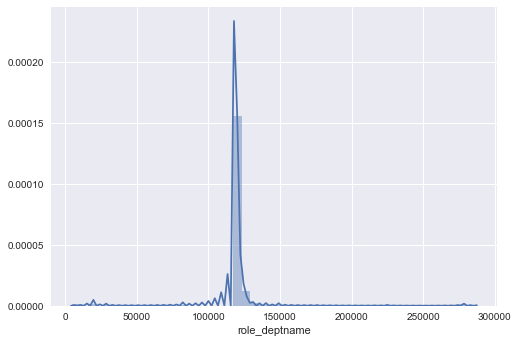

In [67]:
sns.distplot(train['role_deptname']);
train['role_title'].value_counts()[0:10]

* These are most frequently occuring titles!
   118321    4649  
   117905    3583  
   118784    1772  
   117879    1256  
   118568    1043  

770      152
2270      99
2594      82
1350      71
2014      67
16850     66
3966      64
7807      64
5244      62
5396      62
Name: mgr_id, dtype: int64

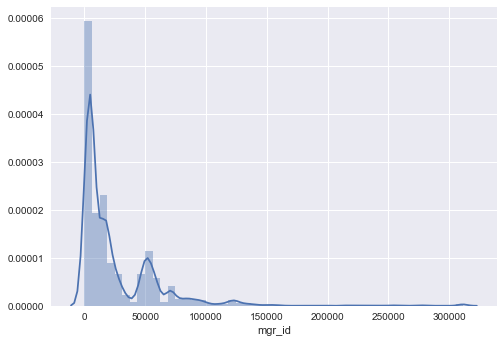

In [68]:
sns.distplot(train['mgr_id']);
train['mgr_id'].value_counts()[0:10]

* some people have a lot of people under them... others are generally around 40-50

117961    21407
117902      742
91261       721
118315      498
118212      400
118290      398
119062      375
118887      334
117916      295
118169      291
Name: role_rollup_1, dtype: int64

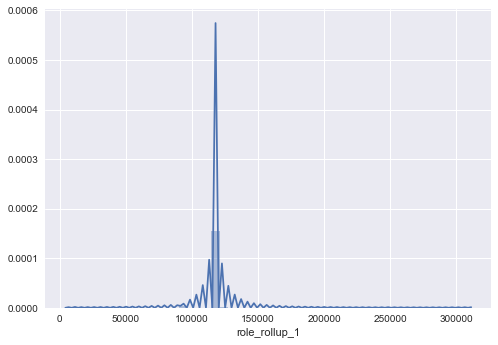

In [69]:
sns.distplot(train['role_rollup_1']);
train['role_rollup_1'].value_counts()[0:10]

118300    4424
118343    3945
118327    2641
118225    2547
118386    1796
118052    1665
117962    1567
118413    1295
118446     971
118026     721
Name: role_rollup_2, dtype: int64

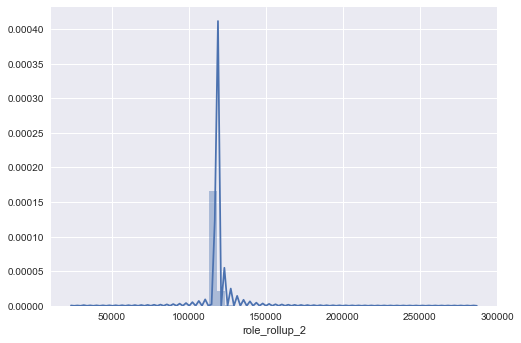

In [70]:
sns.distplot(train['role_rollup_2']);
train['role_rollup_2'].value_counts()[0:10]

* 21407 has the same role_1 which is significant number.. probably a bigger hierarchy or vertical kind!
* role_2 has some biggies.. but more-or-less not too much skewed

117878    1135
117941     763
117945     659
118514     601
117920     597
117884     546
119598     543
118403     532
119181     525
120722     501
Name: role_deptname, dtype: int64

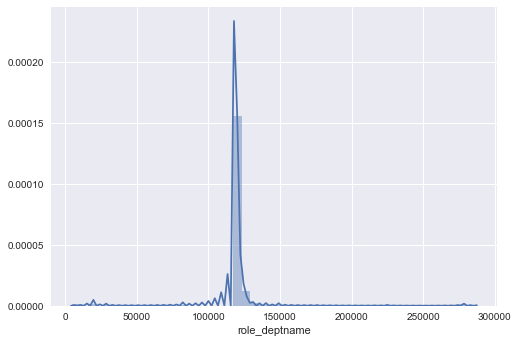

In [71]:
sns.distplot(train['role_deptname']);
train['role_deptname'].value_counts()[0:10]

117906    6896
240983    1244
117913     670
279443     665
117886     530
130134     419
117897     351
117879     333
168365     324
133686     321
Name: role_family_desc, dtype: int64

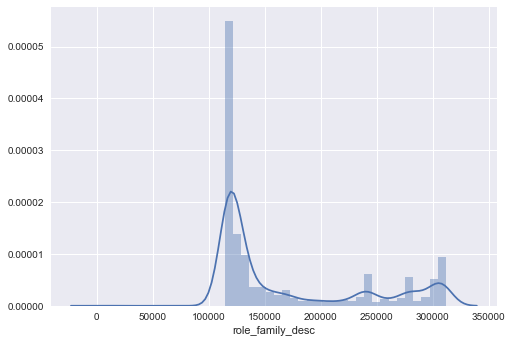

In [72]:
sns.distplot(train['role_family_desc']);
train['role_family_desc'].value_counts()[0:10]

290919    10980
118424     2690
19721      2636
117887     2400
292795     1318
118398     1294
308574     1287
118453      941
118331      892
118638      783
Name: role_family, dtype: int64

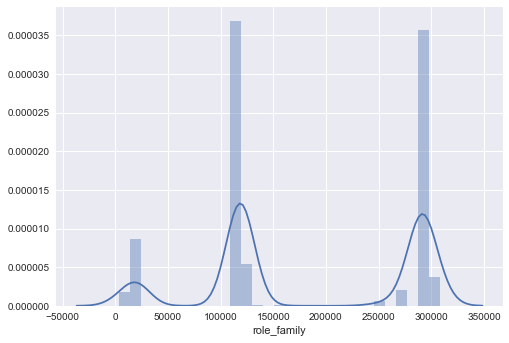

In [73]:
sns.distplot(train['role_family']);
train['role_family'].value_counts()[0:10]

118322    4649
117908    3583
118786    1772
117880    1256
118570    1043
117888     806
118055     774
118687     597
118779     566
118454     521
Name: role_code, dtype: int64

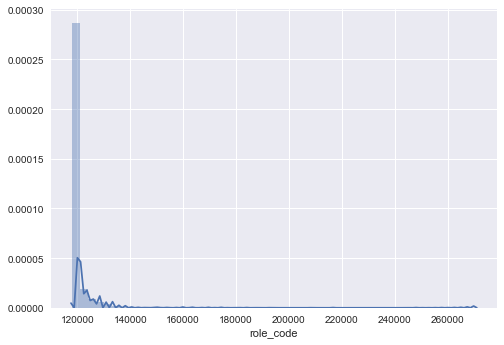

In [74]:
sns.distplot(train['role_code']);
train['role_code'].value_counts()[0:10]

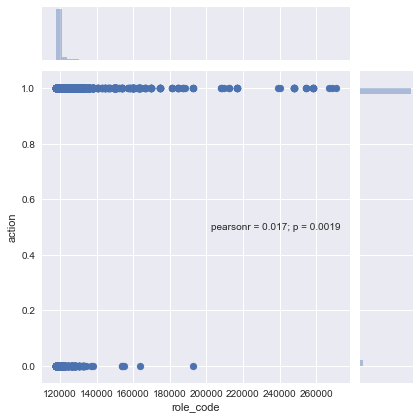

In [75]:
sns.jointplot(x="role_code", y="action", data=train);

# Model


## Logistic regression with One-hot encoding

In [10]:
def load_data(filename, use_labels=True):
    """
    Load data from CSV files and return them as numpy arrays
    The use_labels parameter indicates whether one should
    read the first column (containing class labels). If false,
    return all 0s. 
    """

    # load column 1 to 8 (ignore last one)
    data = np.loadtxt(open(filename), delimiter=',',
                      usecols=range(1, 9), skiprows=1)
    if use_labels:
        labels = np.loadtxt(open(filename), delimiter=',',
                            usecols=[0], skiprows=1)
    else:
        labels = np.zeros(data.shape[0])
    return labels, data


def save_results(predictions, filename):
    """Given a vector of predictions, save results in CSV format."""
    with open(filename, 'w') as f:
        f.write("id,ACTION\n")
        for i, pred in enumerate(predictions):
            f.write("%d,%f\n" % (i + 1, pred))

In [29]:
from sklearn import svm
model = AdaBoostClassifier(RandomForestClassifier(n_estimators=1000, bootstrap=True, oob_score=True, n_jobs=-1, class_weight='balanced_subsample',max_depth=10),
                         algorithm="SAMME",
                         n_estimators=10)

#model = svm.SVC(kernel='linear', class_weight={0: 10}, probability=True)
y, X = load_data('train.csv')
y_test, X_test = load_data('test.csv', use_labels=False)
SEED = 42  # always use a seed for randomized procedures
# === one-hot encoding === #
# we want to encode the category IDs encountered both in
# the training and the test set, so we fit the encoder on both
encoder = preprocessing.OneHotEncoder()
encoder.fit(np.vstack((X, X_test)))
X = encoder.transform(X)  # Returns a sparse matrix (see numpy.sparse)
X_test = encoder.transform(X_test)

# if you want to create new features, you'll need to compute them
# before the encoding, and append them to your dataset after
####
# === training & metrics === #
mean_auc = 0.0
n = 5  # repeat the CV procedure 10 times to get more precise results
for i in range(n):
    # for each iteration, randomly hold out 20% of the data as CV set
    X_train, X_cv, y_train, y_cv = cross_validation.train_test_split(X, y, test_size=.20, random_state=i*SEED)

    # if you want to perform feature selection / hyperparameter
    # optimization, this is where you want to do it
    
    # train model and make predictions
    model.fit(X_train, y_train) 
    preds = model.predict_proba(X_cv)[:, 1]

    # compute AUC metric for this CV fold
    fpr, tpr, thresholds = metrics.roc_curve(y_cv, preds)
    roc_auc = metrics.auc(fpr, tpr)
    print "AUC (fold %d/%d): %f" % (i + 1, n, roc_auc)
    mean_auc += roc_auc

print "Mean AUC: %f" % (mean_auc/n)

# === Predictions === #
# When making predictions, retrain the model on the whole training set
model.fit(X, y)
preds = model.predict_proba(X_test)[:, 1]
save_results(preds, "output.csv")

# Output

In [16]:
print random_forest_classifier.feature_importances_
print train.columns

[ 0.17255866  0.32831817  0.0558901   0.12489038  0.03930218  0.08706383
  0.0438851   0.09239388  0.0556977 ]
Index([u'action', u'resource', u'mgr_id', u'role_rollup_1', u'role_rollup_2',
       u'role_deptname', u'role_title', u'role_family_desc', u'role_family',
       u'role_code'],
      dtype='object')


In [35]:
test = pd.read_csv('test.csv')

In [36]:
test.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [16]:
test = pd.read_csv('test.csv')
def split_target_value(dataframe, column):
    target_value = dataframe[column].copy()
    dataframe    = dataframe.drop([column],axis=1)
    return dataframe, target_value

test_dataframe, id_column = split_target_value(test, 'id')
output = random_forest_classifier.predict(test_dataframe)

NameError: name 'random_forest_classifier' is not defined

In [14]:
output_dataframe = pd.DataFrame({'id' : id_column,
                                     'ACTION' : preds})
output_dataframe.to_csv('output.csv',index=False)

NameError: name 'id_column' is not defined

In [30]:
%%bash
kg submit output.csv -u sp4658@nyu.edu  -p shivi2909 -c amazon-employee-access-challenge -m 'ada boost'

Starting new HTTPS connection (1): www.kaggle.com



In [21]:
output[0:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1])